#After Vaccination

##Common libraries and data

####Importing libraries for basic data processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

####Downloading and sorting dataset

In [2]:
#After vaccination
covid_df = pd.read_csv("/content/drive/MyDrive/Final Year Project/saved data/covid_afterVaccination_dataset.csv")
global_data = pd.read_csv("/content/drive/MyDrive/Final Year Project/saved data/covidData_withISO.csv")

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70951 entries, 0 to 70950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 70951 non-null  int64  
 1   Unnamed: 0_x               70951 non-null  int64  
 2   location                   70951 non-null  object 
 3   iso_code                   70951 non-null  object 
 4   total_vaccination_per_day  70951 non-null  float64
 5   Unnamed: 0_y               70951 non-null  int64  
 6   Country/Region             70951 non-null  object 
 7   dates                      70951 non-null  object 
 8   confirmed_cases            70951 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [3]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150540 entries, 0 to 150539
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       150540 non-null  int64 
 1   Country/Region   150540 non-null  object
 2   dates            150540 non-null  object
 3   confirmed_cases  150540 non-null  int64 
 4   iso_code         150540 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.7+ MB


In [4]:
covid_df.dates = pd.to_datetime(covid_df.dates,infer_datetime_format=True)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70951 entries, 0 to 70950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 70951 non-null  int64         
 1   Unnamed: 0_x               70951 non-null  int64         
 2   location                   70951 non-null  object        
 3   iso_code                   70951 non-null  object        
 4   total_vaccination_per_day  70951 non-null  float64       
 5   Unnamed: 0_y               70951 non-null  int64         
 6   Country/Region             70951 non-null  object        
 7   dates                      70951 non-null  datetime64[ns]
 8   confirmed_cases            70951 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [5]:
covid_df

,Unnamed: 0,Unnamed: 0_x,location,iso_code,total_vaccination_per_day,Unnamed: 0_y,Country/Region,dates,confirmed_cases
0,0,0,Afghanistan,AFG,0.0,397,Afghanistan,2021-02-22,55617
1,1,1,Afghanistan,AFG,1367.0,398,Afghanistan,2021-02-23,55646
2,2,2,Afghanistan,AFG,2734.0,399,Afghanistan,2021-02-24,55664
3,3,3,Afghanistan,AFG,4101.0,400,Afghanistan,2021-02-25,55680
4,4,4,Afghanistan,AFG,5468.0,401,Afghanistan,2021-02-26,55696
...,...,...,...,...,...,...,...,...,...
70946,70946,87816,Zimbabwe,ZWE,4372952.0,154434,Zimbabwe,2022-03-06,6842244
70947,70947,87817,Zimbabwe,ZWE,4375484.0,154435,Zimbabwe,2022-03-07,6906704
70948,70948,87818,Zimbabwe,ZWE,4377788.0,154436,Zimbabwe,2022-03-08,6972949
70949,70949,87819,Zimbabwe,ZWE,4380368.0,154437,Zimbabwe,2022-03-09,7047195


##Data preprocessing

In [6]:
covid_sorted_df = {}
for country in covid_df['Country/Region'].unique():
  min_date = covid_df[covid_df['Country/Region'] == country].dates.min()
  covid_sorted_df[country] = covid_df[covid_df['Country/Region'] == country].sort_values(by=['dates']).copy()
  covid_sorted_df[country]['days'] = (covid_sorted_df[country].dates - min_date).dt.days

In [7]:
covid_sorted_df['Afghanistan'].days.min()

0

In [8]:
covid_sorted_df['India']

,Unnamed: 0,Unnamed: 0_x,location,iso_code,total_vaccination_per_day,Unnamed: 0_y,Country/Region,dates,confirmed_cases,days
28173,28173,35997,India,IND,0.0,62759,India,2021-01-15,12333,0
28174,28174,35998,India,IND,191181.0,62760,India,2021-01-16,12355,1
28175,28175,35999,India,IND,303331.0,62761,India,2021-01-17,12400,2
28176,28176,36000,India,IND,454681.0,62762,India,2021-01-18,12453,3
28177,28177,36001,India,IND,623390.0,62763,India,2021-01-19,12518,4
...,...,...,...,...,...,...,...,...,...,...
28589,28589,36413,India,IND,967225377.0,63175,India,2022-03-07,28127,416
28590,28590,36414,India,IND,967482854.0,63176,India,2022-03-08,28379,417
28591,28591,36415,India,IND,967743046.0,63177,India,2022-03-09,28583,418
28592,28592,36416,India,IND,967978162.0,63178,India,2022-03-10,29117,419


In [9]:
len(covid_sorted_df) == covid_df['Country/Region'].nunique()

True

####Functions for processing data

In [10]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

####Scaling data

In [11]:
vacc_data = {}
scaler = {}

for country in covid_sorted_df.keys():
  #data
  scaling_df = global_data[global_data['Country/Region'] == country].copy()
  temp_df = covid_sorted_df[country].copy()

#Scaling Data=============================================
  scaler[country] = MinMaxScaler(feature_range=(0, 1))
  
  #Fitting data
  global_x = scaling_df.confirmed_cases.values
  global_x = global_x.reshape(len(global_x), 1)
  scaler[country].fit(global_x)

  #transforming data
  x = temp_df.confirmed_cases.values
  x = x.reshape((len(x), 1))
  x = scaler[country].transform(x)
  temp_df.confirmed_cases = np.reshape(x,len(x))
  
  #train data
  vacc_data[country] = temp_df['confirmed_cases'].to_numpy(copy = True)

In [12]:
#test data for model
test_x = {}
test_y = {}

#creating data for model
look_back = 7                 #change this value to select number of timestamps
for country in vacc_data.keys():
  test_x[country], test_y[country] = create_dataset(vacc_data[country], look_back)
  
  test_x[country] = np.reshape(test_x[country], (test_x[country].shape[0], look_back, 1))

In [13]:
test_x['Afghanistan'].shape, test_y['Afghanistan'].shape

((371, 7, 1), (371,))

In [14]:
test_y['Afghanistan'][:2]

array([0.31671156, 0.31685931])

In [15]:
test_x['Afghanistan'][:2]

array([[[0.31605237],
        [0.31621717],
        [0.31631946],
        [0.31641038],
        [0.3165013 ],
        [0.31656381],
        [0.31660359]],

       [[0.31621717],
        [0.31631946],
        [0.31641038],
        [0.3165013 ],
        [0.31656381],
        [0.31660359],
        [0.31671156]]])

##Prediction

In [24]:
from keras.models import load_model
countryDict = {'India', 'US', 'Australia', 'Albania', 'United Kingdom', 'South Africa' }

####Loading models and libraries

In [25]:
# Saved models loaded from a file
model_gru = {}

#days for each country
days_test = {}

#output to change dimension
y_test = {}

# Variables to store predictions
pred_gru_test = {}

In [26]:
#Loading models
for country in countryDict:
  model_gru[country] = load_model(f"/content/drive/MyDrive/Final Year Project/GRU_models/before_vaccination/{country}")

In [27]:
test_x['India'].shape

(414, 7, 1)

####Predicting data

In [28]:
#prediction
for country in countryDict:
  temp_test_df = covid_sorted_df[country]
  
  days_test[country] = temp_test_df.dates[7:]

  test_pred = model_gru[country].predict(test_x[country])

  pred_gru_test[country] = scaler[country].inverse_transform(test_pred)

  y_test[country] = scaler[country].inverse_transform(test_y[country].reshape(-1, 1))

In [29]:
for country in countryDict:
  print(f"{country}:\t{pred_gru_test[country].shape}")

United Kingdom:	(418, 1)
South Africa:	(382, 1)
Albania:	(418, 1)
US:	(446, 1)
Australia:	(377, 1)
India:	(414, 1)


####Plotting prediction on Test Data

In [30]:
days_test['India'].shape, vacc_data['India'].shape, test_x['India'].shape

((414,), (421,), (414, 7, 1))

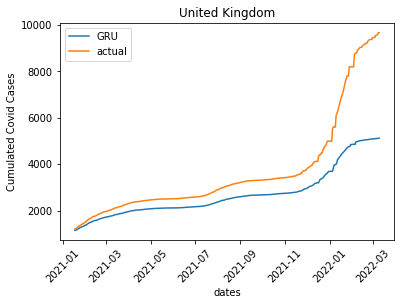

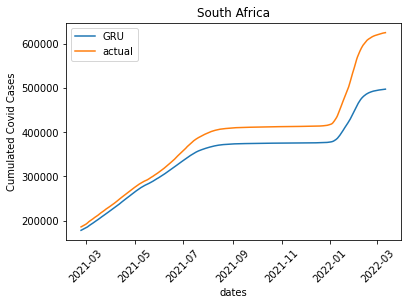

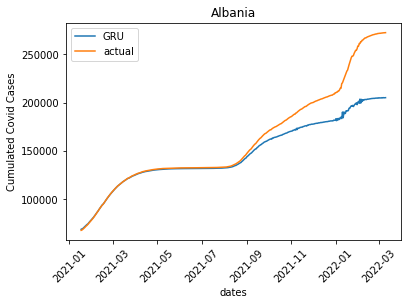

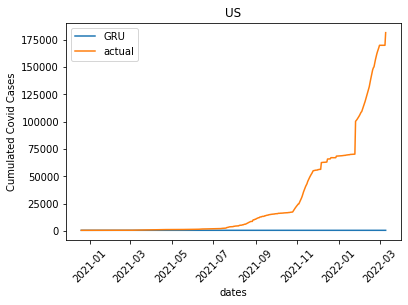

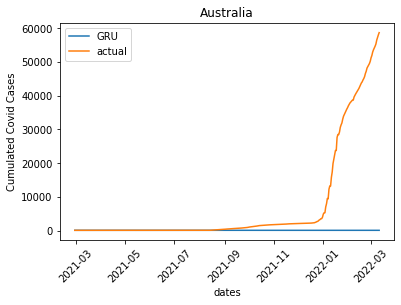

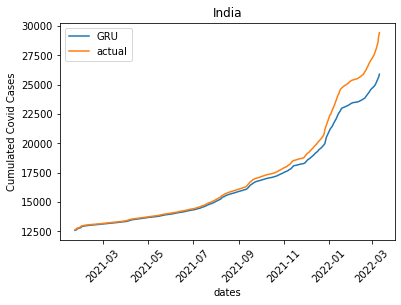

In [31]:
for country in countryDict:
  X =  days_test[country]
  plt.plot(X, pred_gru_test[country])
  plt.plot(X, y_test[country])
  plt.legend(['GRU', 'actual'])
  plt.xticks(rotation = 45)
  plt.xlabel('dates')
  plt.ylabel('Cumulated Covid Cases')
  plt.title(country)
  plt.show()